In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

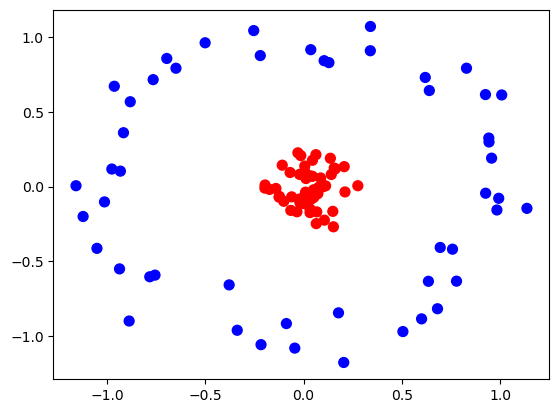

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

##### Kernal is the func which we use to modify the dimension of dataset such that when we increase its dimension it should get linearly seperated.Various funcs are used for that like sigmoid ,polynomial ,rbf ,etc.

##### Here , we will first try to create a model with regular kernal i.e linear ..it will not give us satisfactory result as the dataset is non linear.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [5]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7

In [7]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\bagwe\AppData\Local\Temp\ipykernel_12440\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


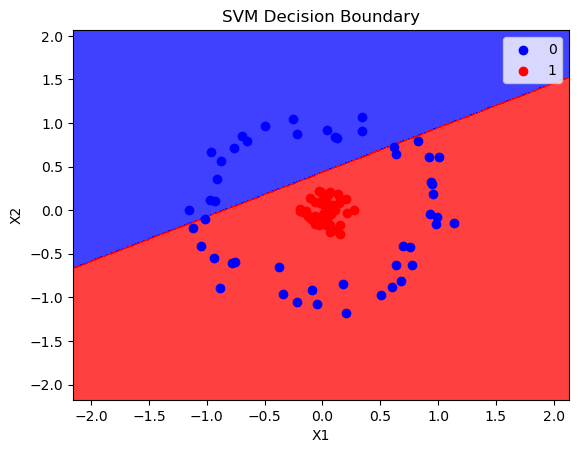

In [8]:
plot_decision_boundary(X, y, classifier)

##### As we can see , when we use linear kernal ..model is not able to classify correctly.

##### Now , if we try to transform our data into another higher dimension , we can get linear seperable data.

In [9]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

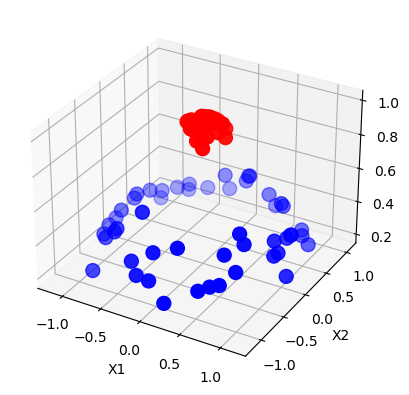

In [10]:
plot_3d_plot(X,y)

##### Now ,lets try another kernal functions.

In [11]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)


1.0

C:\Users\bagwe\AppData\Local\Temp\ipykernel_12440\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


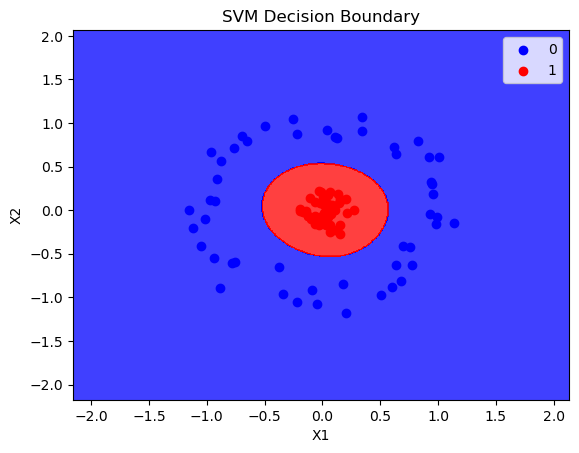

In [13]:
plot_decision_boundary(X, y, rbf_classifier)

In [14]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\bagwe\AppData\Local\Temp\ipykernel_12440\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


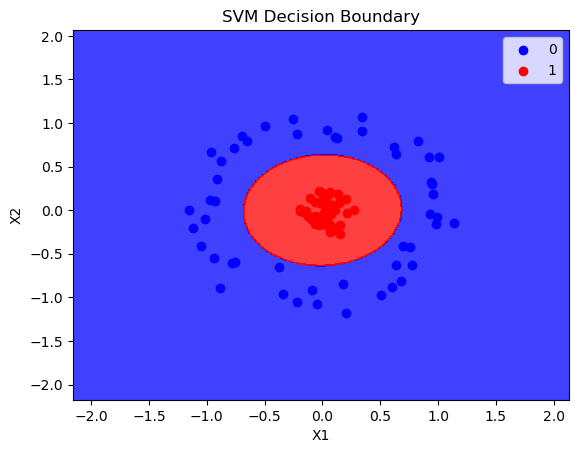

In [16]:
plot_decision_boundary(X, y, poly_classifier)

In [17]:
X

array([[ 0.61888887,  0.72891613],
       [-0.06843564,  0.09416022],
       [-0.01431743,  0.2071341 ],
       [ 0.11188295,  0.00528493],
       [ 0.0365827 ,  0.91439755],
       [-0.04479692, -1.07843927],
       [ 0.062653  ,  0.21334732],
       [ 0.15579634,  0.12407057],
       [ 0.14862045, -0.16526152],
       [-0.02026028,  0.08175699],
       [-0.78231337, -0.60209251],
       [ 0.04532602,  0.0686096 ],
       [ 0.77792521, -0.63130871],
       [ 0.20425266, -1.17432635],
       [-0.50078662,  0.96040028],
       [ 0.82866781,  0.79055346],
       [ 0.75746827, -0.4178619 ],
       [-0.02896454,  0.22552791],
       [ 0.03857335, -0.08368282],
       [ 0.94210414,  0.32432361],
       [ 0.0976824 , -0.00164147],
       [ 0.69494405, -0.40636528],
       [ 0.03223919, -0.14887511],
       [-0.76519272,  0.71425322],
       [ 0.21062252, -0.03555685],
       [ 0.04514512,  0.17594598],
       [ 0.1361836 ,  0.18930853],
       [-1.01272508, -0.10218037],
       [ 0.98332173,

In [18]:
np.exp(-(X**2)).sum(1)

array([1.2696262 , 1.98650056, 1.95779787, 1.9875323 , 1.43205016,
       1.31053261, 1.95158558, 1.96074408, 1.95121233, 1.99292769,
       1.23818116, 1.99325145, 1.21727515, 1.2109587 , 1.17576411,
       1.0385138 , 1.40318976, 1.94957043, 1.99153485, 1.31181614,
       1.99050083, 1.46474354, 1.97704119, 1.15721721, 1.95534426,
       1.96748127, 1.94642179, 1.34819041, 1.3562088 , 1.98917862,
       1.97100809, 1.36519183, 1.99253324, 1.96222144, 1.16655651,
       1.27012392, 1.04970276, 1.11034014, 1.99166728, 1.17503132,
       1.24530574, 1.97383078, 1.26184699, 1.98728687, 1.19145303,
       1.93992205, 1.98022289, 1.29082044, 1.94060223, 1.99209418,
       1.92665006, 1.98035833, 1.27543225, 1.20951513, 1.42565349,
       1.96197147, 1.32582561, 1.09708775, 1.41767466, 1.37260637,
       1.9708996 , 1.93659892, 1.99693771, 1.33016328, 1.9941926 ,
       1.96804384, 1.31058391, 1.48735019, 1.48220509, 1.98850532,
       1.99695084, 1.98074056, 1.9796038 , 1.1430821 , 1.15596

In [19]:
X_new=np.exp(-(X**2))

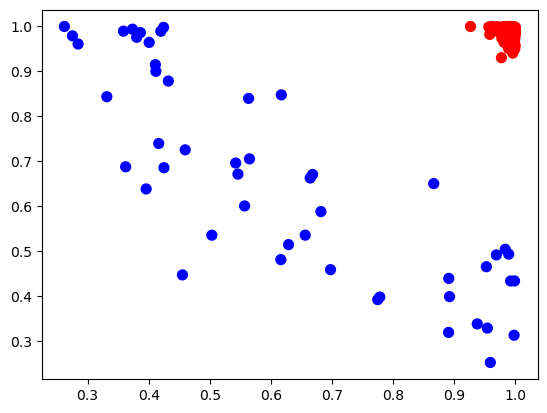

In [20]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')